<a href="https://colab.research.google.com/github/rachelresende/Desafio_Tuberculose/blob/main/Desafio_Tuberculose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Hipoteses que devem ser respondidas

1. Qual o total, maximo, minimo e media de mortes no ano de 2013.
2. Quais nacoes tiveram os melhores e piores resultados?
3. Qual o rate de mortes ( considerando a cada 100.000 > habitantes) por nacao? 
4. Quais foram as nacoes com o maior e o menor rate?

As respostas se encontram ao final do notebook. 

##Importando Bibliotecas

In [ ]:
!pip install pyecharts-jupyter-installer
!pip install pyecharts



In [342]:
import warnings
warnings.simplefilter('ignore', FutureWarning)
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.cm as cm 
from math import pi

##Git e GitHub

In [343]:
!git clone https://github.com/rachelresende/Desafio_Tuberculose.git

fatal: destination path 'Desafio_Tuberculose' already exists and is not an empty directory.


In [344]:
!git push --set-upstream origin main


fatal: not a git repository (or any of the parent directories): .git


## Importando Dados



In [345]:
#Precisamos entender melhor a origem desses dados, pois os dois datasets sao muito parecidos
data = pd.read_excel("/content/Desafio_Tuberculose/WHO POP TB some.xls")
data

,Country,Population (1000s),TB deaths
0,Angola,21472,6900
1,Brazil,200362,4400
2,China,1393337,41000
3,Equatorial Guinea,757,67
4,Guinea-Bissau,1704,1200
5,India,1252140,240000
6,Mozambique,25834,18000
7,Portugal,10608,140
8,Russian Federation,142834,17000
9,Sao Tome and Principe,193,18


In [346]:
brics = data.loc[[1,8,5,2,10]] 
brics

,Country,Population (1000s),TB deaths
1,Brazil,200362,4400
8,Russian Federation,142834,17000
5,India,1252140,240000
2,China,1393337,41000
10,South Africa,52776,25000


In [347]:
portugues = data.loc[[0,1,4,6,7,9,11]] 
portugues

,Country,Population (1000s),TB deaths
0,Angola,21472,6900
1,Brazil,200362,4400
4,Guinea-Bissau,1704,1200
6,Mozambique,25834,18000
7,Portugal,10608,140
9,Sao Tome and Principe,193,18
11,Timor-Leste,1133,990


In [348]:
# Dicionario paises que falam idioma portugues 
portugues = {'País': ['Angola', 'Brazil', 'Guinea-Bissau	', 'Mozambique', 'Portugal', 'Sao Tome and Principe	', 'Timor-Leste	'],
        'PopulaçãoM': [21472, 200362, 1704, 25834,10608,193,1133],
                'Mortes': [6900, 4400, 1200, 18000,140,18,990]
       }
# Transformanco em Dataset
data= pd.DataFrame(portugues)

#Organizando os dados em order decrescente 
portugues = data.sort_values(by='Mortes', ascending=False)


Funcoes

In [359]:
num_1 = 1
print(f"{num_1:0>10}")

num_2 = 150
print(f"{num_2:0>10}")



0000000001
0000000150


In [ ]:
def formatar (valor):
  return'{:,.3f}'.format(valor) ##formatando

In [350]:
def percentage(part, whole):
  percentage = tbM * 100 / tbP
  return str(percentage) + "%"

In [351]:
## Outra alternativa de solucao
## portugues["Rate"] = portugues["Mortes"]*100/portugues["PopulaçãoM"]
## portugues.round()

portugues['Mortes'] = portugues['Mortes'].astype(float)
portugues['PopulaçãoM'] = portugues['PopulaçãoM'].astype(float)

tbM = portugues['Mortes']
tbP = portugues['PopulaçãoM']
pais = portugues['País']	
portugues['Mortes(per 100,000)'] = tbM * 100 / tbP
tbMc = portugues['Mortes(per 100,000)']
portugues.round()


,País,PopulaçãoM,Mortes,"Mortes(per 100,000)"
3,Mozambique,25834.0,18000.0,70.0
0,Angola,21472.0,6900.0,32.0
1,Brazil,200362.0,4400.0,2.0
2,Guinea-Bissau\t,1704.0,1200.0,70.0
6,Timor-Leste\t,1133.0,990.0,87.0
4,Portugal,10608.0,140.0,1.0
5,Sao Tome and Principe\t,193.0,18.0,9.0


Formatando os Dados da Tabela

In [352]:
portugues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 3 to 5
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   País                 7 non-null      object 
 1   PopulaçãoM           7 non-null      float64
 2   Mortes               7 non-null      float64
 3   Mortes(per 100,000)  7 non-null      float64
dtypes: float64(3), object(1)
memory usage: 280.0+ bytes


Vizualizando os Dados

In [353]:
pd.set_option('display.precision', 2, silent = True)
portugues.style.background_gradient(axis=0, gmap=portugues['Mortes'], cmap='YlOrRd')


,País,PopulaçãoM,Mortes,"Mortes(per 100,000)"
3,Mozambique,25834.000000,18000.000000,69.675621
0,Angola,21472.000000,6900.000000,32.134873
1,Brazil,200362.000000,4400.000000,2.196025
2,Guinea-Bissau,1704.000000,1200.000000,70.422535
6,Timor-Leste,1133.000000,990.000000,87.378641
4,Portugal,10608.000000,140.000000,1.319759
5,Sao Tome and Principe,193.000000,18.000000,9.326425


In [354]:
## print(f'O pais com o maior percentual de mortes por Tuberculose em 2013 foi Mozambique, com {}') - formatacao em formato de texto, chamado de f strg

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


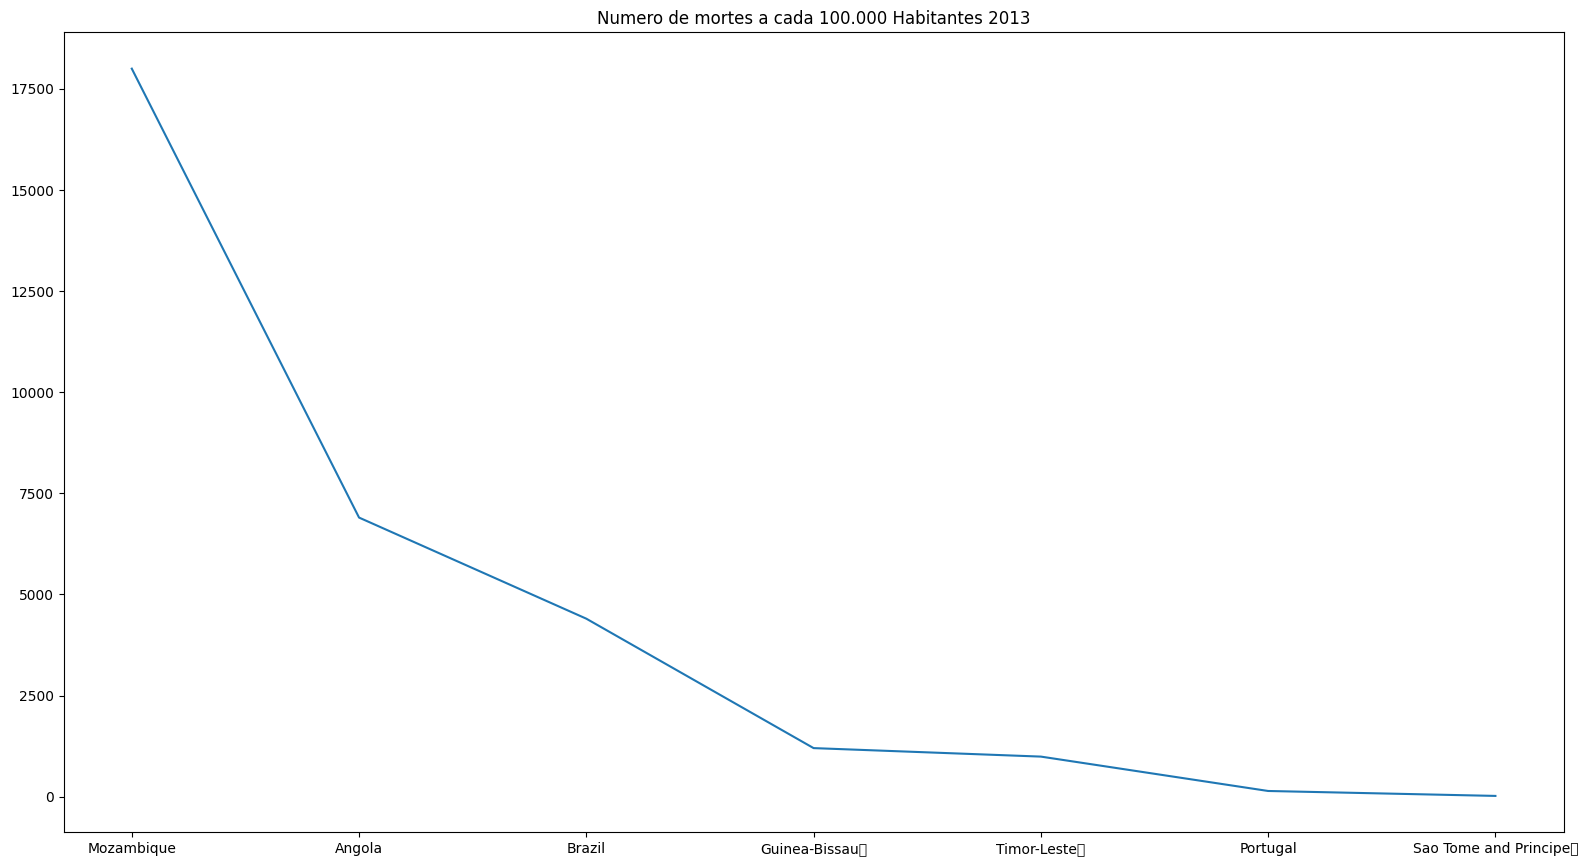

In [355]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0, 0, 1, 1])
plt.title('Numero de mortes a cada 100.000 Habitantes 2013')

ax.plot(pais, tbM)
plt.show()

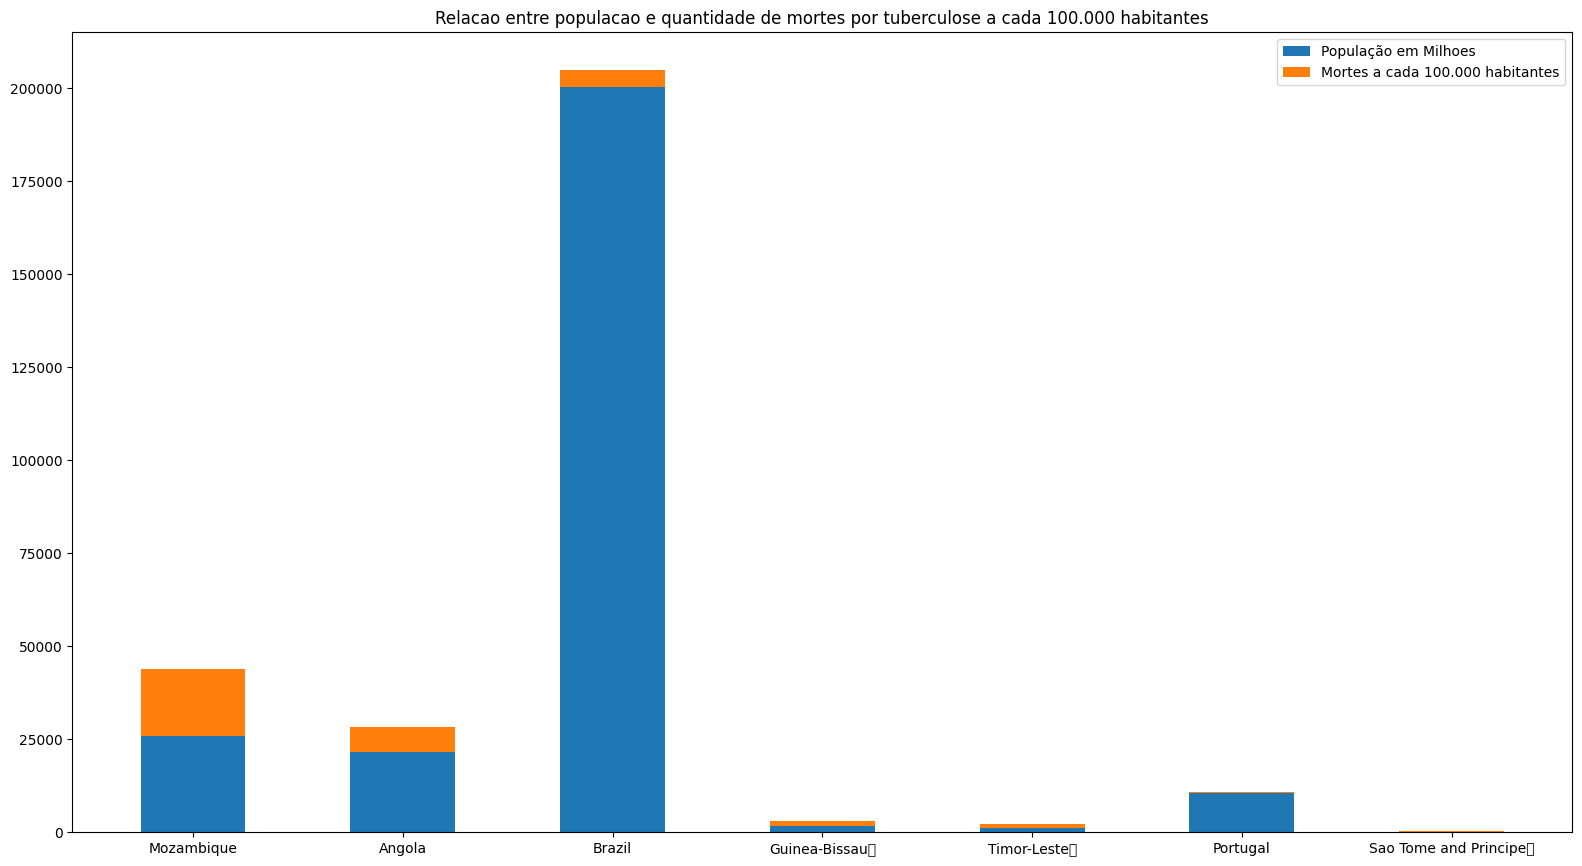

In [356]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0, 0, 1, 1])

bottom = np.zeros(7)

# Example data
people = (25834, 21472, 200362, 1704, 1133, 10608, 193)
mortes = (18000, 6900, 4400, 1200, 990, 140, 18)
y_pos = ('Mozambique', 'Angola', 'Brazil', 'Guinea-Bissau\t', 'Timor-Leste\t'	, 'Portugal', 'Sao Tome and Principe\t'	)
performance =(25834, 21472, 200362, 1704, 1133, 10608, 193)

weight_counts = {
    "População em Milhoes": np.array(people),
    "Mortes a cada 100.000 habitantes": np.array(mortes),
}
width = 0.5

for boolean, weight_count in weight_counts.items():
    p = ax.bar(y_pos, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Relacao entre populacao e quantidade de mortes por tuberculose a cada 100.000 habitantes")
ax.legend(loc="upper right")

plt.show()

In [ ]:
# 1. Qual o total, maximo, minimo e media de mortes no ano de 2013.
valor_minimo = tbMc.min()
print(f" O valor minimo de mortes por 100.000 habitantes foi de aproximadamente {(valor_minimo).round(3)}"" mil")
valor_maximo = tbMc.max()
print(f"O valor maximo de mortes por 100.000 habitantes foi de aproximadamente {(valor_maximo).round(3)} "" mil")
valor_media = tbMc.mean()
print(f"O valor medio de mortes por 100.000 habitantes foi de aproximadamente {(valor_media).round(3)} "" mil")
# 2. Quais nacoes tiveram os melhores e piores resultados?
print("Portugal teve o menor impacto negativo por 100.000 habitantes, enquanto Timor-Lesteteve o maior impacto negativo")
# 3. Qual o rate de mortes ( considerando a cada 100.000 > habitantes) por nacao? 
print("a lista de paises esta apresentada na tabela analisada acima")
# 4. Quais foram as nacoes com o maior e o menor rate?
print("a lista de paises esta apresentada na tabela analisada acima")


fatal: not a git repository (or any of the parent directories): .git


fatal: not a git repository (or any of the parent directories): .git
